In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [4]:
dfs = []
for year in [2019, 2020, 2021, 2022]:
    for semester in [1, 2]:
        file_path = f'Data/ca-{year}-0{semester}.csv'
        temp_df = pd.read_csv(file_path, delimiter=';', decimal=',', encoding='utf8')
        dfs.append(temp_df)
df = pd.concat(dfs, ignore_index=True)

In [5]:
display(df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2019,4.199,3.5766,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2019,2.899,2.3513,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,03/01/2019,3.349,2.8841,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,03/01/2019,2.439,NaN,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,02/01/2019,4.399,3.8550,R$ / litro,BRANCA


In [6]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y') #muda o formato de data que ta no arquivo
df['Ano'] = df['Data da Coleta'].dt.year
df['Mês'] = df['Data da Coleta'].dt.month

# Agrupando por Município, Produto, Ano e Mês e calculando a média de Valor de Venda
df_media = df.groupby(['Municipio', 'Produto', 'Ano', 'Mês'])['Valor de Venda'].mean().reset_index()

display(df_media.head())

,Municipio,Produto,Ano,Mês,Valor de Venda
0,ABAETETUBA,DIESEL,2019,1,4.051500
1,ABAETETUBA,DIESEL,2019,2,4.019375
2,ABAETETUBA,DIESEL,2019,3,3.978750
3,ABAETETUBA,DIESEL,2019,4,4.067500
4,ABAETETUBA,DIESEL,2019,5,4.120556


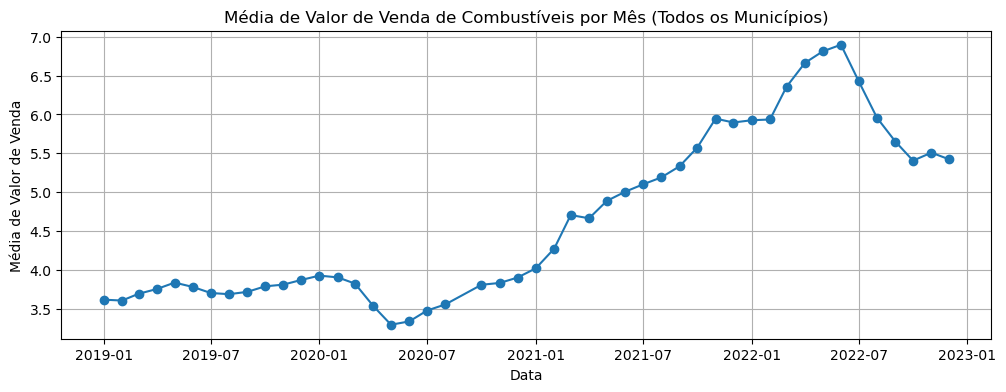

In [7]:
# Agrupando por Ano, Mês e calculando a média dos valores de venda
media_mensal = df_media.groupby(['Ano', 'Mês'])['Valor de Venda'].mean().reset_index()

media_mensal['Data'] = pd.to_datetime(media_mensal[['Ano', 'Mês']].assign(DAY=1).astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
media_mensal = media_mensal.sort_values('Data') # Ordenando o DataFrame por data

plt.figure(figsize=(12, 4))
plt.plot(media_mensal['Data'], media_mensal['Valor de Venda'], marker='o', linestyle='-')
plt.title('Média de Valor de Venda de Combustíveis por Mês (Todos os Municípios)')
plt.xlabel('Data')
plt.ylabel('Média de Valor de Venda')
plt.grid(True)
plt.show()

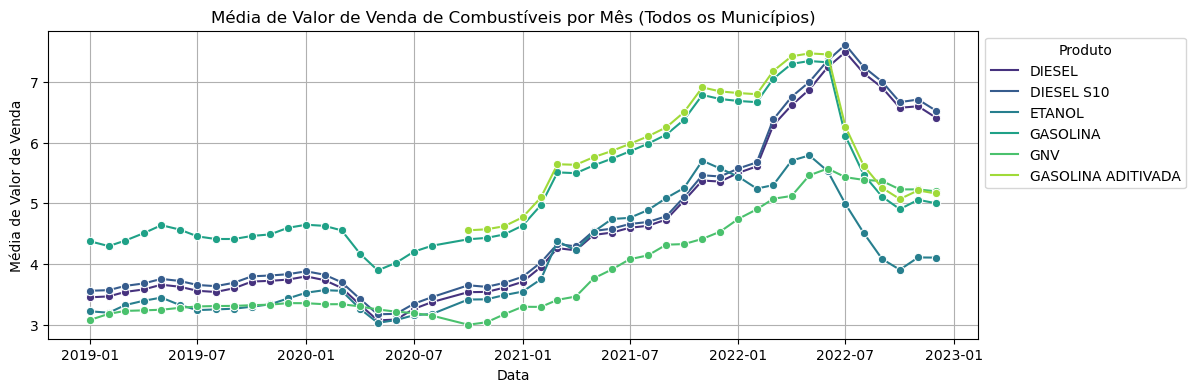

In [8]:
# Agrupando por Ano, Mês, Produto e calculando a média dos valores de venda
media_mensal = df_media.groupby(['Ano', 'Mês', 'Produto'])['Valor de Venda'].mean().reset_index()

# Mesma data para todo mes
media_mensal['Data'] = pd.to_datetime(media_mensal[['Ano', 'Mês']].assign(DAY=1).astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

# Ordenando o DataFrame por data
media_mensal = media_mensal.sort_values('Data')

# Plata várias curvas para os combustíveis
plt.figure(figsize=(12, 4))
sns.lineplot(x='Data', y='Valor de Venda', hue='Produto', data=media_mensal, marker='o', palette='viridis', linestyle='-')
plt.title('Média de Valor de Venda de Combustíveis por Mês (Todos os Municípios)')
plt.xlabel('Data')
plt.ylabel('Média de Valor de Venda')
plt.grid(True)
plt.legend(title='Produto', bbox_to_anchor=(1, 1))
plt.show()

In [9]:
#Só ETANOL e Gasolina

# Agrupando por Ano, Mês, Produto e calculando a média dos valores de venda
media_mensal = df_media.groupby(['Ano', 'Mês', 'Produto'])['Valor de Venda'].mean().reset_index()

# Filtrando apenas as linhas correspondentes a GASOLINA e ETANOL
media_mensal = media_mensal[media_mensal['Produto'].isin(['GASOLINA', 'ETANOL'])]

# Criando uma coluna de data (mesma data para todo mês, usando o último dia do mês)
media_mensal['Data'] = pd.to_datetime(media_mensal[['Ano', 'Mês']].assign(DAY=1).astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

# Ordenando o DataFrame por data
media_mensal = media_mensal.sort_values('Data')

# Produtos como colunas
df_combustiveis = media_mensal.pivot_table(index='Data', columns='Produto', values='Valor de Venda', aggfunc='mean').reset_index()



display(df_combustiveis.head())



Produto,Data,ETANOL,GASOLINA
0,2019-01-01,3.220250,4.372454
1,2019-02-01,3.197986,4.295210
2,2019-03-01,3.323995,4.386766
3,2019-04-01,3.394618,4.507145
4,2019-05-01,3.446875,4.639813


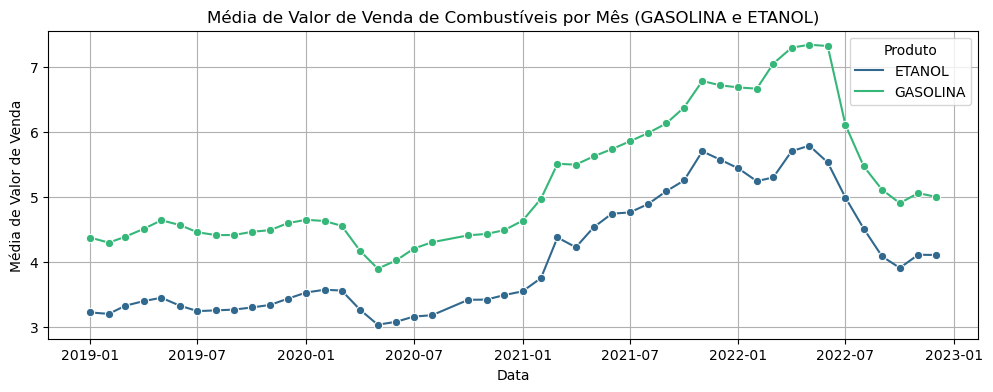

In [10]:
# Filtrando apenas as linhas correspondentes a GASOLINA e ETANOL
filtro_produtos = ['GASOLINA', 'ETANOL']
media_mensal_filtrada = media_mensal[media_mensal['Produto'].isin(filtro_produtos)]

# Plotando o gráfico de série temporal apenas para GASOLINA e ETANOL
plt.figure(figsize=(12, 4))
sns.lineplot(x='Data', y='Valor de Venda', hue='Produto', data=media_mensal_filtrada, marker='o', palette='viridis', linestyle='-')
plt.title('Média de Valor de Venda de Combustíveis por Mês (GASOLINA e ETANOL)')
plt.xlabel('Data')
plt.ylabel('Média de Valor de Venda')
plt.grid(True)
plt.legend(title='Produto', bbox_to_anchor=(1, 1))
plt.show()


In [11]:
# Adicione a data ausente ao vetor data_mes
df_combustiveis = pd.concat([df_combustiveis, pd.DataFrame({'Data': ['2020-09-01'], 'GASOLINA': [None], 'ETANOL': [None]})], ignore_index=True)
# Ordene o DataFrame pela coluna 'Data'
df_combustiveis['Data'] = pd.to_datetime(df_combustiveis['Data'])
df_combustiveis = df_combustiveis.sort_values(by='Data')

# Obtenha o índice da nova data adicionada
indice_nova_data = df_combustiveis[df_combustiveis['Data'] == '2020-09-01'].index[0]

# Calcule a média entre os valores nos índices 19 e 20 para preencher a data adicionada na posição 20
media_gasolina = (df_combustiveis.loc[19, 'GASOLINA'] + df_combustiveis.loc[20, 'GASOLINA'])/2
media_etanol = (df_combustiveis.loc[19, 'ETANOL'] + df_combustiveis.loc[20, 'ETANOL'])/2

df_combustiveis.at[indice_nova_data, 'GASOLINA'] = media_gasolina
df_combustiveis.at[indice_nova_data, 'ETANOL'] = media_etanol

df_combustiveis.set_index('Data', inplace=True)
print(df_combustiveis)

              ETANOL  GASOLINA
Data                          
2019-01-01  3.220250  4.372454
2019-02-01  3.197986  4.295210
2019-03-01  3.323995  4.386766
2019-04-01  3.394618  4.507145
2019-05-01  3.446875  4.639813
2019-06-01  3.325481  4.567370
2019-07-01  3.240657  4.455531
2019-08-01  3.252051  4.412009
2019-09-01  3.264053  4.412328
2019-10-01  3.296836  4.462126
2019-11-01  3.336313  4.487893
2019-12-01  3.432609  4.596351
2020-01-01  3.527442  4.647145
2020-02-01  3.569742  4.628622
2020-03-01  3.557605  4.553813
2020-04-01  3.262270  4.170004
2020-05-01  3.031168  3.894590
2020-06-01  3.076230  4.020352
2020-07-01  3.156845  4.203510
2020-08-01  3.177908  4.302124
2020-09-01  3.296345  4.354783
2020-10-01  3.414782  4.407441
2020-11-01  3.418344  4.430064
2020-12-01  3.487771  4.487381
2021-01-01  3.545720  4.634033
2021-02-01  3.749127  4.970293
2021-03-01  4.375320  5.509567
2021-04-01  4.223851  5.496672
2021-05-01  4.530074  5.623551
2021-06-01  4.741746  5.735941
2021-07-

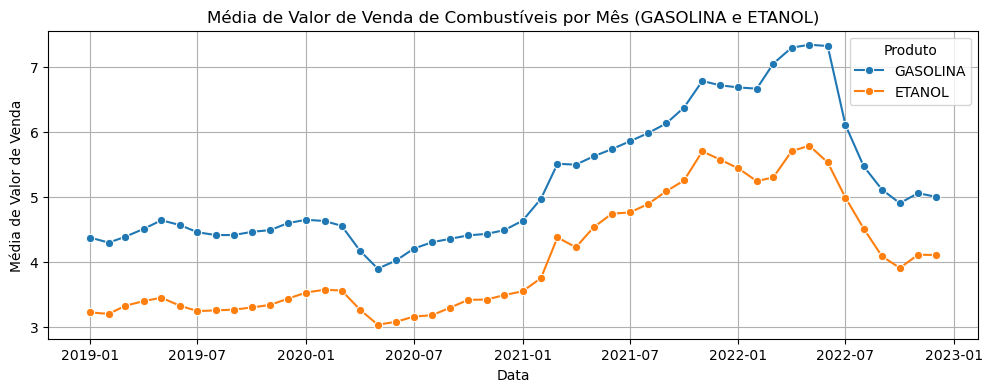

In [12]:
# Plotando o gráfico de série temporal apenas para GASOLINA e ETANOL
plt.figure(figsize=(12, 4))
sns.lineplot(x='Data', y='GASOLINA', data=df_combustiveis, marker='o', label='GASOLINA', linestyle='-')
sns.lineplot(x='Data', y='ETANOL', data=df_combustiveis, marker='o', label='ETANOL', linestyle='-')
plt.title('Média de Valor de Venda de Combustíveis por Mês (GASOLINA e ETANOL)')
plt.xlabel('Data')
plt.ylabel('Média de Valor de Venda')
plt.grid(True)
plt.legend(title='Produto', bbox_to_anchor=(1, 1))
plt.show()

# IGP-M


In [13]:

nome_arquivo = 'IGP-M_percentuais.csv'
# Especificar o formato da data para o parser e o encoding correto
df_igpm = pd.read_csv(nome_arquivo, delimiter=';', encoding='ISO-8859-1')
# Substituir ' Data' pelo nome correto da coluna de data

df_igpm['Data'] = pd.to_datetime(df_igpm['Data'], format='%d/%m/%Y')

# Filtrar as datas de 2019 até 2022
df_igpm = df_igpm[(df_igpm['Data'] >= '2019-01-01') & (df_igpm['Data'] <= '2022-12-31')]

# Configurar o índice como a coluna de data correta
df_igpm.set_index('Data', inplace=True)

df_igpm = df_igpm * 100  # porcentagem

igpm_mes = df_igpm['IGP-M% mês'] 
igpm_12 = df_igpm['IGP-M% 12 m'] 


In [14]:
display(df_igpm.head())

,IGP-M% mês,IPA-M% mês,IPC-M% mês,INCC-M% mês,IGP-M% 12 m,IPA-M% 12 m,IPC-M% 12 m,INCC-M% 12 m
Data,,,,,,,,
2019-01-01,0.01,-0.26,0.58,0.40,6.74,8.16,4.15,4.09
2019-02-01,0.88,1.22,0.26,0.19,7.60,9.50,4.13,4.14
2019-03-01,1.26,1.67,0.58,0.19,8.27,10.34,4.58,4.11
2019-04-01,0.92,1.07,0.69,0.49,8.64,10.73,4.97,4.32
2019-05-01,0.45,0.54,0.35,0.09,7.64,9.17,5.07,4.09


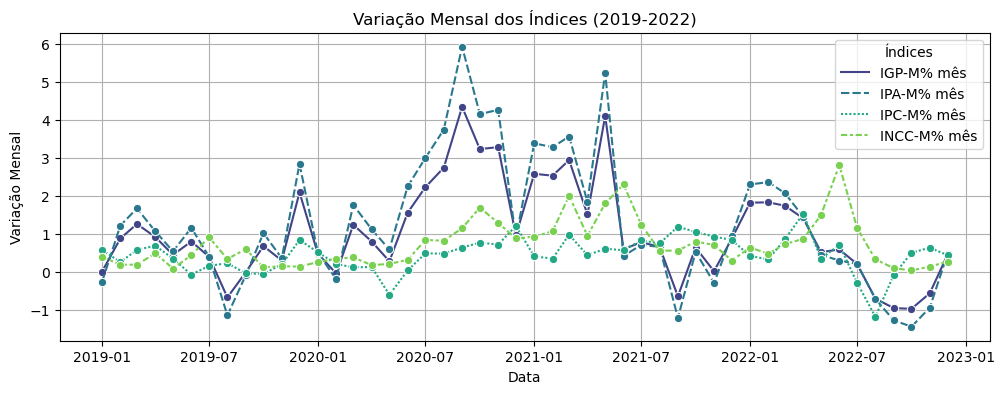

In [15]:
# Plotar as duas séries históricas usando Seaborn
plt.figure(figsize=(12, 4))

# Série de valores mensais
sns.lineplot(data=df_igpm[['IGP-M% mês', 'IPA-M% mês', 'IPC-M% mês', 'INCC-M% mês']], marker='o', palette='viridis', linestyle='-')
plt.title('Variação Mensal dos Índices (2019-2022)')
plt.xlabel('Data')
plt.ylabel('Variação Mensal')
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1, 1))
plt.show()

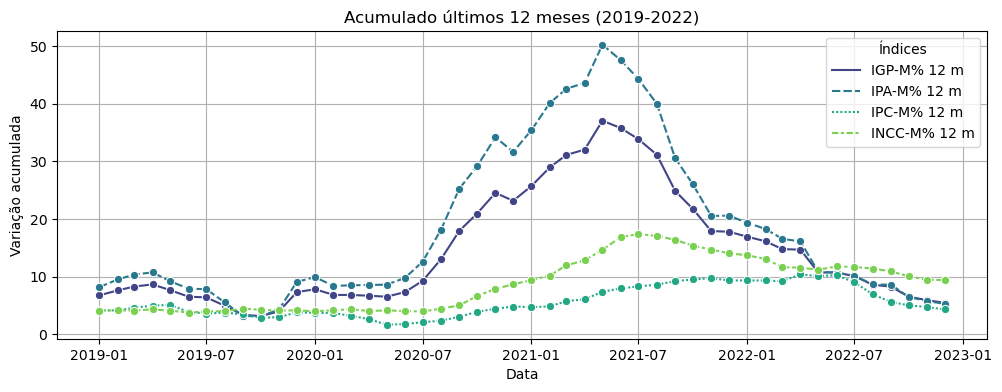

In [16]:
# Plotar as duas séries históricas usando Seaborn
plt.figure(figsize=(12, 4))

# Série de valores mensais
sns.lineplot(data=df_igpm[['IGP-M% 12 m', 'IPA-M% 12 m', 'IPC-M% 12 m', 'INCC-M% 12 m']], marker='o', palette='viridis', linestyle='-')
plt.title('Acumulado últimos 12 meses (2019-2022)')
plt.xlabel('Data')
plt.ylabel('Variação acumulada')
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()

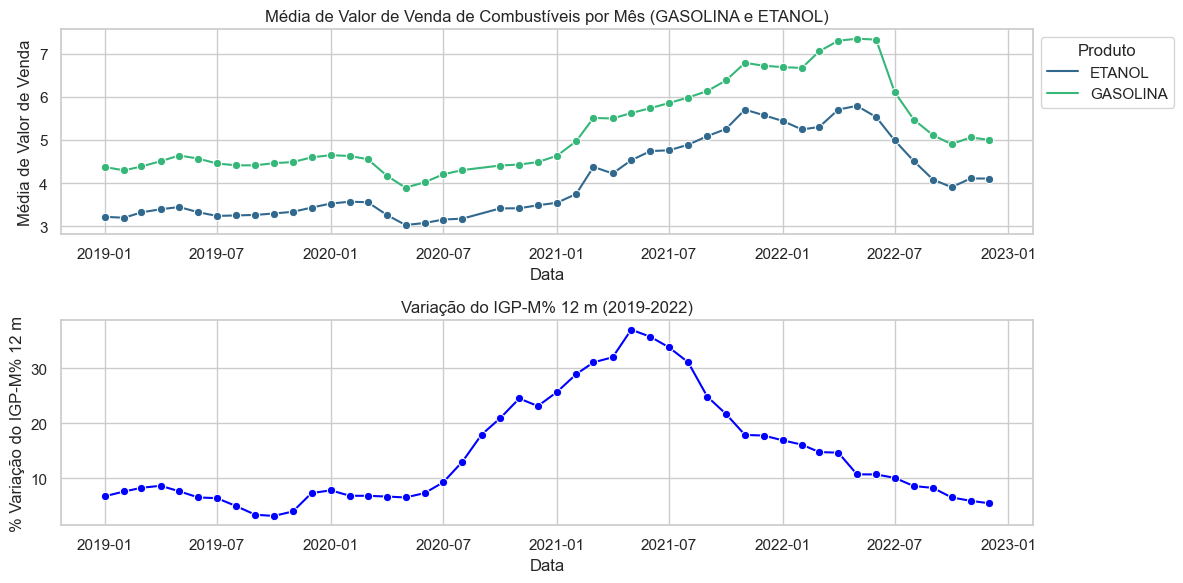

In [26]:
sns.set(style="whitegrid")

# Criar uma figura com dois subgráficos (2 linhas, 1 coluna) - invertido
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Filtrando apenas as linhas correspondentes a GASOLINA e ETANOL
filtro_produtos = ['GASOLINA', 'ETANOL']
media_mensal_filtrada = media_mensal[media_mensal['Produto'].isin(filtro_produtos)]

# Plotando o gráfico de série temporal apenas para GASOLINA e ETANOL
sns.lineplot(ax=axes[0], x='Data', y='Valor de Venda', hue='Produto', data=media_mensal_filtrada, marker='o', palette='viridis', linestyle='-')
axes[0].set_title('Média de Valor de Venda de Combustíveis por Mês (GASOLINA e ETANOL)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Média de Valor de Venda')
axes[0].grid(True)
axes[0].legend(title='Produto', bbox_to_anchor=(1, 1), loc='upper left')  # Posição corrigida da legenda

# Plotar a série histórica 'IGP-M% Acumulado dos últimos 12 m' usando Seaborn
sns.lineplot(ax=axes[1], x=df_igpm.index, y=df_igpm['IGP-M% 12 m'], marker='o', color='blue', linestyle='-')
axes[1].set_title('Variação do IGP-M% 12 m (2019-2022)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('% Variação do IGP-M% 12 m')
axes[1].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()


# Duas séries temporais

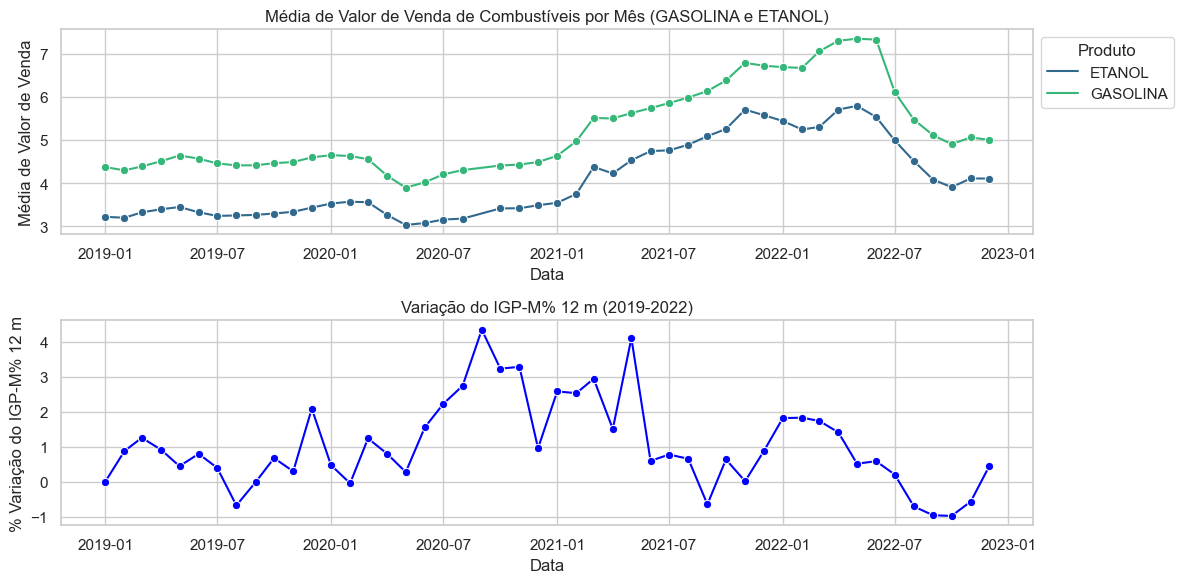

In [18]:
sns.set(style="whitegrid")

# Criar uma figura com dois subgráficos (2 linhas, 1 coluna) - invertido
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Filtrando apenas as linhas correspondentes a GASOLINA e ETANOL
filtro_produtos = ['GASOLINA', 'ETANOL']
media_mensal_filtrada = media_mensal[media_mensal['Produto'].isin(filtro_produtos)]

# Plotando o gráfico de série temporal apenas para GASOLINA e ETANOL
sns.lineplot(ax=axes[0], x='Data', y='Valor de Venda', hue='Produto', data=media_mensal_filtrada, marker='o', palette='viridis', linestyle='-')
axes[0].set_title('Média de Valor de Venda de Combustíveis por Mês (GASOLINA e ETANOL)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Média de Valor de Venda')
axes[0].grid(True)
axes[0].legend(title='Produto', bbox_to_anchor=(1, 1), loc='upper left')  # Posição corrigida da legenda

# Plotar a série histórica 'IGP-M% Acumulado dos últimos 12 m' usando Seaborn
sns.lineplot(ax=axes[1], x=df_igpm.index, y=df_igpm['IGP-M% mês'], marker='o', color='blue', linestyle='-')
axes[1].set_title('Variação do IGP-M% 12 m (2019-2022)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('% Variação do IGP-M% 12 m')
axes[1].grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()


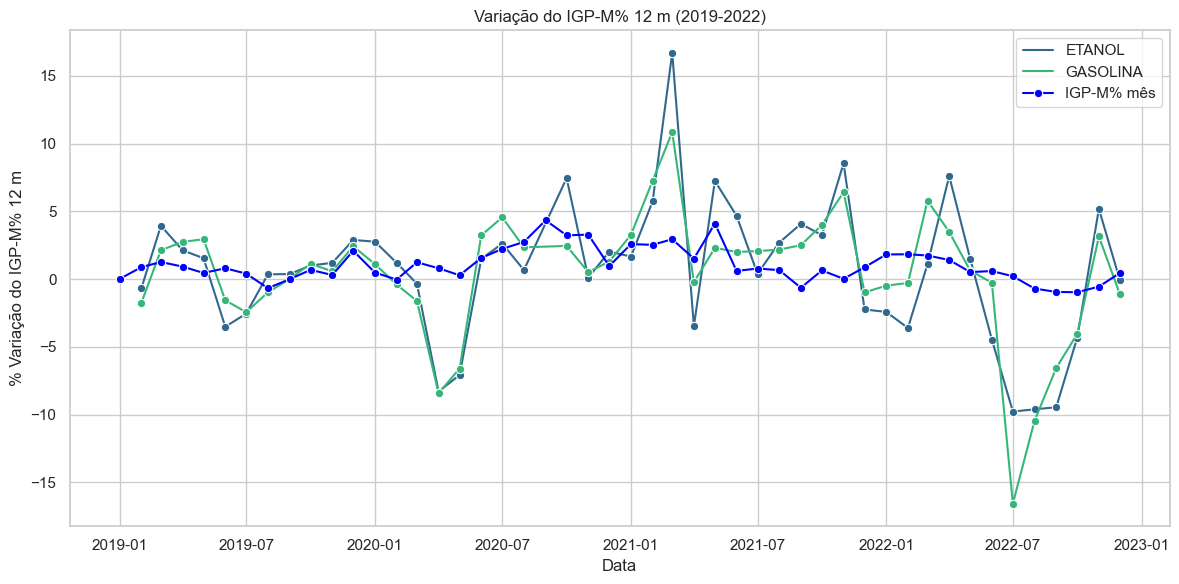

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você tenha os dados em dataframes chamados media_mensal e df_igpm
# Certifique-se de que as colunas necessárias estejam presentes nos dataframes

# Calcular a variação mensal para gasolina e etanol
media_mensal['Variação Mensal'] = media_mensal.groupby('Produto')['Valor de Venda'].pct_change() * 100

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar uma figura com um subgráfico (1 linha, 1 coluna)
fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar apenas as linhas correspondentes a GASOLINA e ETANOL
filtro_produtos = ['GASOLINA', 'ETANOL']
media_mensal_filtrada = media_mensal[media_mensal['Produto'].isin(filtro_produtos)]

# Plotar o gráfico de variação mensal para GASOLINA e ETANOL
sns.lineplot(ax=ax, x='Data', y='Variação Mensal', hue='Produto', data=media_mensal_filtrada, marker='o', palette='viridis', linestyle='-')
ax.set_title('Variação Mensal de Valor de Venda de Combustíveis (GASOLINA e ETANOL)')
ax.set_xlabel('Data')
ax.set_ylabel('Variação Mensal (%)')
ax.grid(True)
ax.legend(title='Produto', bbox_to_anchor=(1, 1), loc='upper left')  # Posição corrigida da legenda

# Plotar a série histórica 'IGP-M% Acumulado dos últimos 12 m' usando Seaborn no mesmo eixo
sns.lineplot(ax=ax, x=df_igpm.index, y=df_igpm['IGP-M% mês'], marker='o', color='blue', linestyle='-', label='IGP-M% mês')
ax.set_title('Variação do IGP-M% 12 m (2019-2022)')
ax.set_xlabel('Data')
ax.set_ylabel('% Variação do IGP-M% 12 m')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()


In [20]:
igpm_mes = df_igpm['IGP-M% mês'] 
igpm_12 = df_igpm['IGP-M% 12 m'] 
gasolina = df_combustiveis['GASOLINA']
etanol = df_combustiveis['ETANOL']

print(len(igpm_mes),
len(igpm_12),
len(gasolina),
len(etanol))

48 48 48 48


# Teste de Correlação

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import itertools
from statsmodels.tsa.api import VAR

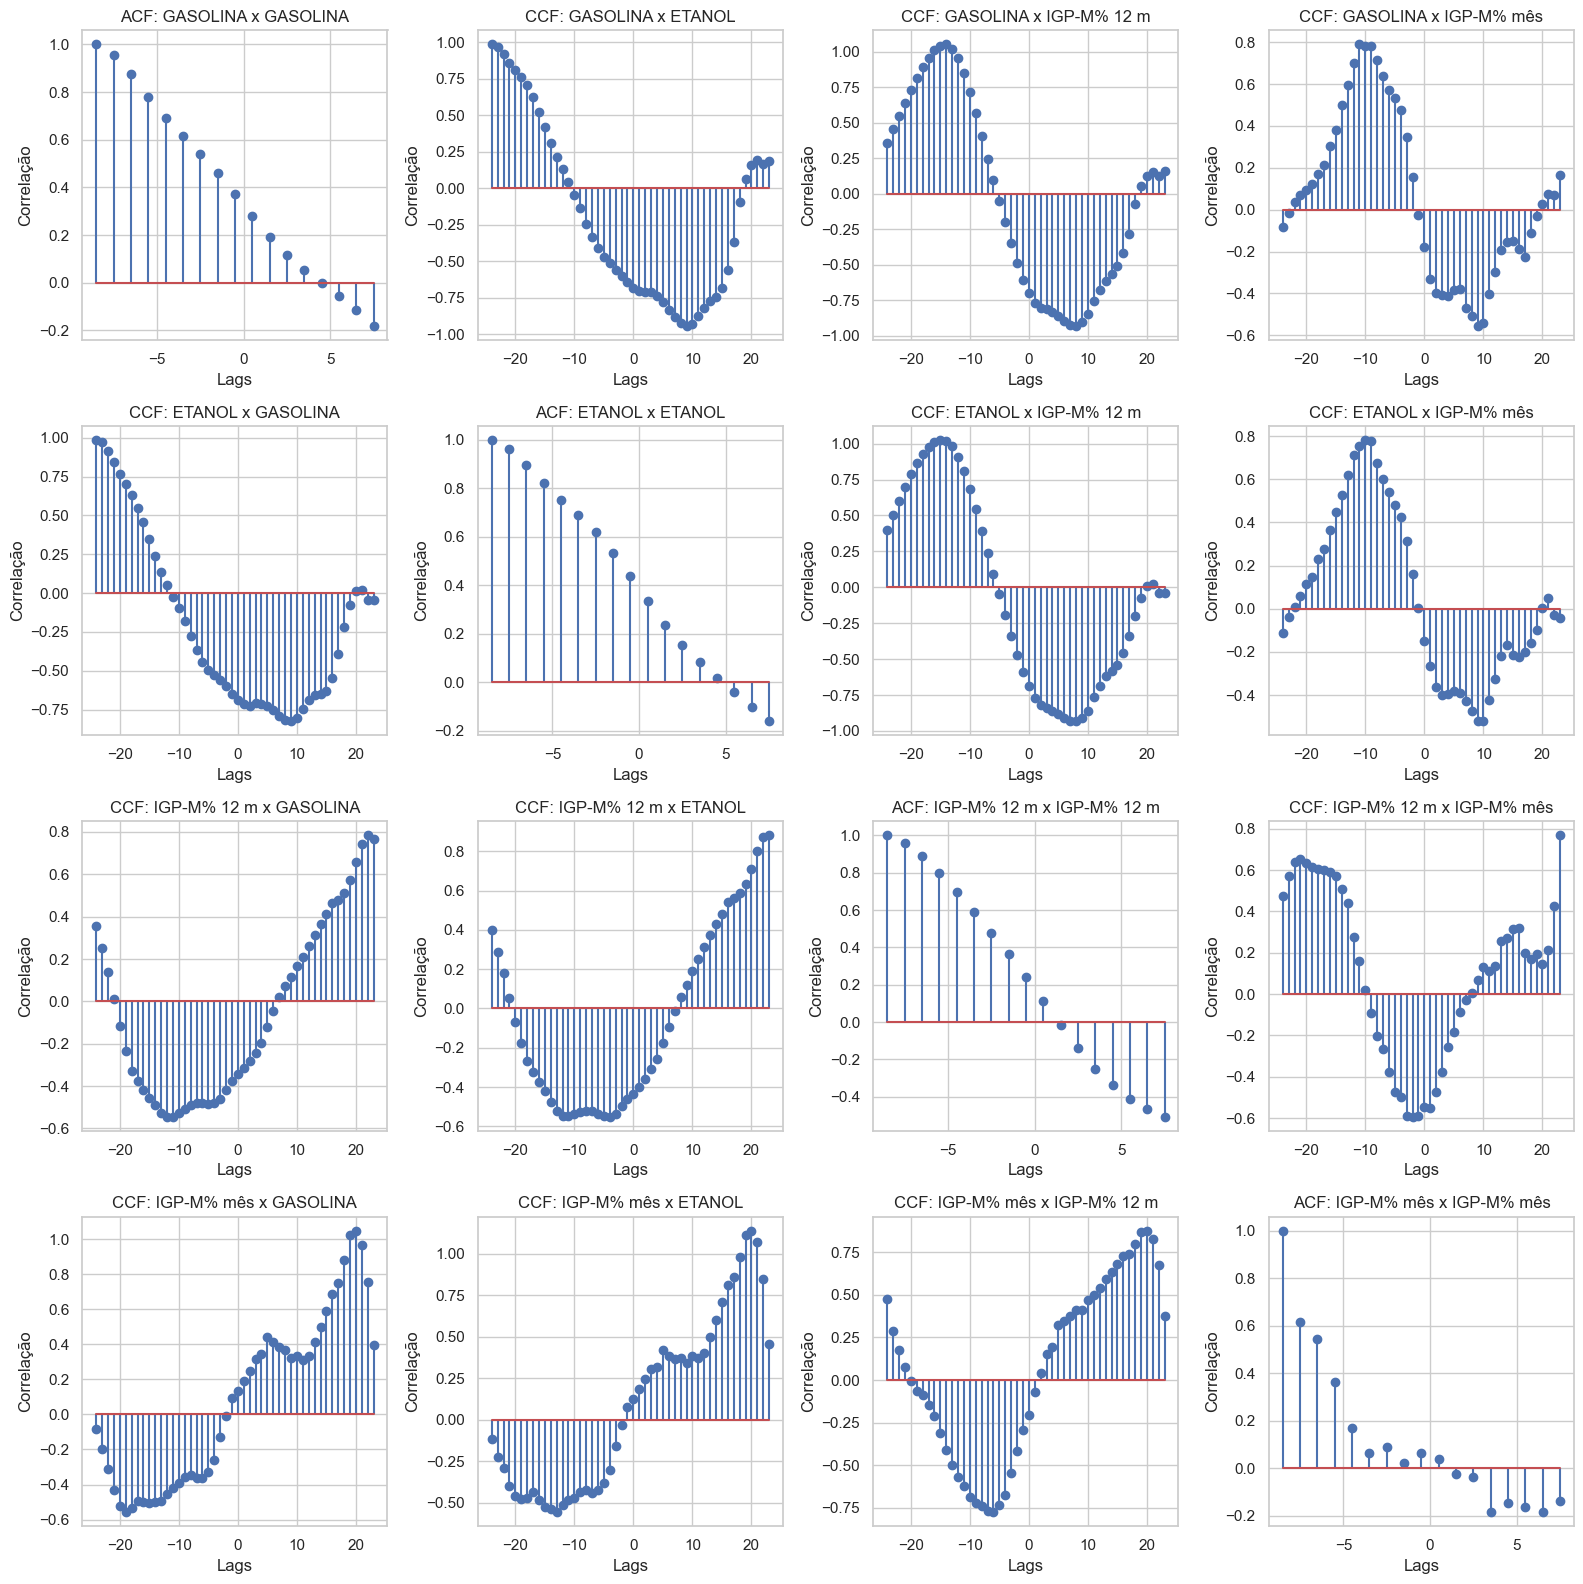

In [19]:
series_temporais = [gasolina, etanol, igpm_12, igpm_mes]

# Todas as permutações possíveis de pares de séries temporais (incluindo autocorrelações)
permutacoes = list(itertools.product(series_temporais, repeat=2))

# Configurar o layout dos subplots
num_linhas, num_colunas = 4, 4
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 16))

# Iterar sobre todas as permutações
for i, permutacao in enumerate(permutacoes):
    serie1, serie2 = permutacao
    
    if serie1 is not serie2:
        ccf_result = sm.tsa.stattools.ccf(serie1, serie2, adjusted=True, fft=True)
        title = f'CCF: {serie1.name} x {serie2.name}'
    else:
        ccf_result = sm.tsa.stattools.acf(serie1, fft=True)
        title = f'ACF: {serie1.name} x {serie1.name}'

    # Número de lags
    nlags = len(ccf_result)

    # Configurar as coordenadas do subplot
    row = i // num_colunas
    col = i % num_colunas
    
    # Gerar o gráfico no subplot correspondente
    axs[row, col].stem(np.arange(-nlags/2, nlags/2), ccf_result)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Lags')
    axs[row, col].set_ylabel('Correlação')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Teste de causalidade de Granger

In [39]:
x = gasolina
y = igpm_12
data = pd.DataFrame({'x': x, 'y': y})
lag = 13 #mudar o lag

# Calcula a porcentagem de mudança e remove os valores nulos
data = data.pct_change().dropna()
test_result = grangercausalitytests(data, [lag], verbose=True) #teste de causalidade de granger 
#test_result = grangercausalitytests(data, lag, verbose=True)


Granger Causality
number of lags (no zero) 13
ssr based F test:         F=0.6963  , p=0.7282  , df_denom=7, df_num=13
ssr based chi2 test:   chi2=43.9681 , p=0.0000  , df=13
likelihood ratio test: chi2=28.2179 , p=0.0084  , df=13
parameter F test:         F=0.6963  , p=0.7282  , df_denom=7, df_num=13


In [21]:
data = pd.DataFrame({'x': igpm_12, 'y': gasolina})

# Calcula a porcentagem de mudança e remove os valores nulos
data = data.pct_change().dropna()

# Teste de causalidade de Granger
max_lag = 3  # Escolha o número máximo de defasagens a serem testadas
test_result = grangercausalitytests(data, [max_lag], verbose=True)


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1438  , p=0.9330  , df_denom=37, df_num=3
ssr based chi2 test:   chi2=0.5131  , p=0.9160  , df=3
likelihood ratio test: chi2=0.5101  , p=0.9167  , df=3
parameter F test:         F=0.1438  , p=0.9330  , df_denom=37, df_num=3


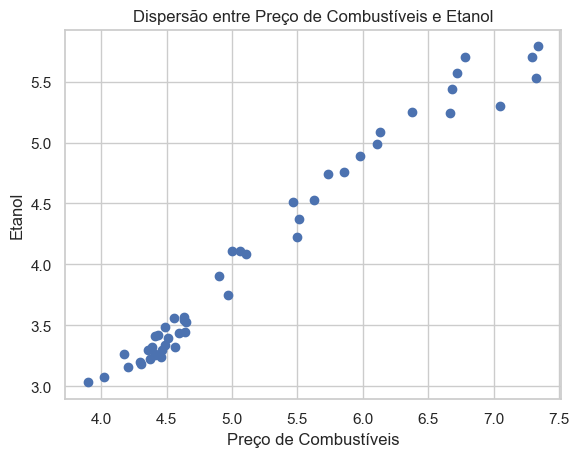

A correlação entre as duas séries é: 0.9861036852891016


In [26]:
# Combine as duas séries temporais em um único DataFrame usando a coluna 'data' como índice
#df = pd.merge(gasolina, igpm, on='data', how='inner')

# Calcule a correlação entre as duas séries
correlacao = gasolina.corr(etanol)
# Crie um gráfico de dispersão para visualizar a relação entre as duas séries
plt.scatter(gasolina, etanol)
plt.title('Dispersão entre Preço de Combustíveis e Etanol')
plt.xlabel('Preço de Combustíveis')
plt.ylabel('Etanol')
plt.show()

print(f'A correlação entre as duas séries é: {correlacao}')

Erro absoluto médio: 9.593213114201966
Erro quadrático médio: 125.66313515287393
Raiz quadrada do erro quadrático médio: 11.209956964809184


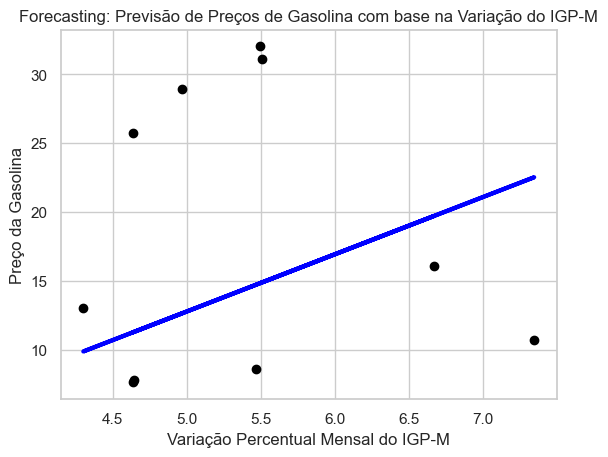

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Supondo que você já tenha df_gasolina e df_igpm definidos em algum lugar do seu código
# Certifique-se de que as datas coincidam nas duas séries temporais

# Merge dos DataFrames nas datas
#df = pd.merge(df_gasolina, df_igpm, on='Data')

# Criando as variáveis de entrada (X) e saída (y)
X = gasolina
y = igpm_12
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo X_train e X_test para matriz 2D
X_train_2d = X_train.values.reshape(-1, 1)
X_test_2d = X_test.values.reshape(-1, 1)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train_2d, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_2d)

# Avaliando o desempenho do modelo
print('Erro absoluto médio:', metrics.mean_absolute_error(y_test, y_pred))
print('Erro quadrático médio:', metrics.mean_squared_error(y_test, y_pred))
print('Raiz quadrada do erro quadrático médio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plotando as previsões
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Forecasting: Previsão de Preços de Gasolina com base na Variação do IGP-M')
plt.xlabel('Variação Percentual Mensal do IGP-M')
plt.ylabel('Preço da Gasolina')
plt.show()
